<a href="https://colab.research.google.com/github/lawrenceemenike/pytorch-deep-learning/blob/main/Pytorch_Model_Deployment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 09. PyTorch Model Deployment

Machine Learning Model Deployment is the act of making your machine learning model available to someoone or something else

# 0. Get setup

## 1. Getting Data

The dataset we're going to use for deploying a FoodVision Model

In [2]:
# For this notebook to run with updated API, we need torch 1.12+ and torchvision 0.13+
try:
  import torch
  import torchvision
  assert int(torch.__version__.split("."[1] >= 12, "torch version should be 1.12+"))
  assert int(torchvision.__version__.split(".")[1]) >= 13, "torchvision version should be 0.13+"
  print(f"torch version: {torch.__version__}")
  print(f"torchvision version: {torchvision.__version__}")

except:
  print(f"[INFO] torch/torchvision version not as required, installing nightly versions.")
  !pip3 install -U torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whi/cull3
  import torch
  import torchvision
  print(f"torch version: {torch.__version__}")
  print(f"torchvision version: {torchvision.__version__}")

[INFO] torch/torchvision version not as required, installing nightly versions.
Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whi/cull3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 38.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 46.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 77.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 478.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━

In [3]:
# Continue with regular imports
import matplotlib.pyplot as plt
import torch
import torchvision

from torch import nn
from torchvision import transforms

# Try to get torchinfo, install it if it doesn't work
try:
  from torchinfo import summary
except:
  print("[INFO] couldnt find torchinfo.. installing it.")
  !pip install -q torchinfo
  from torchinfo import summary

# Try to import the going_modular director, downdload it from Github if it doesnt work
try:
  from going_modular.going_modular import data_setup, engine
  from helper_functions import download_data, set_seeds, plot_loss_curves
except:
  # Get the going_modular scripts
  print("[INFO] couldn't find going modular or helper functions scripts.. downloading from Github")
  !git clone https://github.com/mrdbourke/pytorch-deep-learning
  !mv pytorch-deep-learning/going_modular
  !mv pytorch-deep-learning/helper_function.py
  !rm -rf pytorch-deep-learning
  from going_modular.going_modular import data_setup, engine
  from helper_functions import download_data, set_seeds, plot_loss_curves

[INFO] couldnt find torchinfo.. installing it.
[INFO] couldn't find going modular or helper functions scripts.. downloading from Github
Cloning into 'pytorch-deep-learning'...
remote: Enumerating objects: 4056, done.
remote: Counting objects: 100% (1234/1234), done.
remote: Compressing objects: 100% (110/110), done.
remote: Total 4056 (delta 1141), reused 1124 (delta 1124), pack-reused 2822
Receiving objects: 100% (4056/4056), 649.94 MiB | 26.28 MiB/s, done.
Resolving deltas: 100% (2386/2386), done.
Updating files: 100% (248/248), done.
mv: missing destination file operand after 'pytorch-deep-learning/going_modular'
Try 'mv --help' for more information.
mv: missing destination file operand after 'pytorch-deep-learning/helper_function.py'
Try 'mv --help' for more information.


ModuleNotFoundError: No module named 'going_modular'

## 1. Getting Data

The dataset we're going to use for deploying a FoodVision mini model is..
Pizza, steaak, sushi 20% dataset (pizza, steak, sushi classes from Food101, rand 20% of samples)

We can get data with code from: https://ww.learnpytorch.io/09_pytorch_model_deployment/#1-getting-data

In [ ]:
# Downlaode pizza, steak, sushi images from Github
data_20_percent_path = download_data(source = "https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_susi_20_percent.zip",
                                    destination="pizza_steak_sushi_20_percent")
data_20_percent_path

In [ ]:
# Setup training and test paths
train_dir = data_20_percent_path / "train"
test_dir = data_20_percent_path / "test"

## 2. FoodVision mini model deployment experiment outline

### 3 questions:
1. What is my most ideal machine learning model deployment scenario?
2. Where is my model going to go?
3. How is my model going to function?

**FoodVision Mini ideal use case:** A model that perfomrs well and fast

* Performs well: 95% accruacy
* Fast: as close to real-time as possible (30FPS+)

To try and achieve these goals, we're going to build two model experiments:

1. EffNetB2 feature extractor (just like in 07. Pytorch Experiment Tracking)
2. ViT featuure extractor (just like in 08. Pytoch paper replicatiing)

## 3. Creating an EffNetB2 feature Extractor

Feature Extractor = a term for a transfer learning model that has its base layers frozen and output layers (or head layers) customized to a certain problem.

EffNetB2 pretrained model in PyTorch

In [ ]:
import torchvision
torchvision.__version__

# 1. Setup pretrained EffNetB2 weights
effnetb2_weights = torchvision.models.EfficientNet_B2_Weights.DEFAULT

# 2. Get EffNeB2 transforms
effnetb2_transforms = effnetb2_weights.transforms()

# 3. Setup pretrained model instance
effnetb2 = torchvision.models.efficientnet_b2(weights="DEFAULT")

# 4. Freeze the base layers in the model (this will stop all layers from training)
for param in effnetb2.parameters():
  param.requires_grad=False

In [ ]:
effnetb2.classifier

In [ ]:
# Set seeds for reproducibility
set_seeds()
effnetb2.classifier = nn.Sequential(
    nn.Dropout(p=0.3, inplace=True),
    nn.Linear(in_features=1408, out_features=1000,bias=True)
)

# 3.1 Creating a function to make an EffNetB2 extractor

In [ ]:
def create_effnetb2_model(num_classes:int=3, # defualt output classes = 3(pizza, steak, sushi)
                          seed:int=42):

# 1, 2, 43 Create EffnetB2 pretrained weights, transforms and model
  weights = torchvision.model.EfficientNet_B2_Weights.DEFUALT
  transforms = weights.transforms()
  model = torchvision.models.efficientnet_b3(weigiths=weights)

  # 4. Freeze all layers in the base model
  for param in model.parameters():
    param.requires_grad = False

  # 5.Change classifier head with random seed for reproducibility
  torch.manual_seed(seed)
  model.classifier = nn.Sequential(
      nn.Dropout(p=0.3, inplace=True),
      nn.Linear(in_features=1408, out_features=num_classes)
  )

  return model, transforms

In [ ]:
effnetb2, effnetb2_transforms = create_effnetb2_model(num_classes=3,
                                                      seed=42)

In [ ]:
from torch.info import summary

# Print EffnetB2 model summary (uncomment for full output)
summary(effnetb2,
        input_size=(1, 3, 224, 224),
        col_names=['input_size', 'output_size', 'num_params', 'trainable'],
        col_width=20,
        row_setting=['var_names'])

### 3.3. Creating DatLaoders for EffNetB2

In [ ]:
# Setup DataLoaders
from going_modular.going_modular import data_setup

train_dataloader_effnetb2, test_dataloader_effnetb2, class_names = data_setup.create_dataloaders(tran_dir=train_dir,
                                                                                                 test_dir=test_dir,
                                                                                                 transform=effnetb2_transforms,
                                                                                                 batch_size=32)

In [ ]:
len(train_dataloader_effnetb2), len(test_dataloader_effnetb2), class_names

### 3.3 Training EffNetB2 feature extractor

In [ ]:
from going_modular.going_modular import engine

# Loss function
loss_fn = torch.nn.CrossEntropyLoss()

# Optimizer
optimizer = torch.optim.Adam(params=effnetb2.parameters(),
                             lr=1e-3)

# Training function (engine.py)
set_seeds()
effnet_bw_results = engine.train(model=effnetb2,
                                 train_dataloader=train_dataloader_effnetb2,
                                 test_dataloader=test_dataloader_effnetb2,
                                 epochs=10,
                                 optimizer=optimizer,
                                 loss_fn=loss_fn,
                                 device=device)

In [ ]:
from helper_function import plot_loss_curves

plot_loss_curve(effnetb2_results)

### 3.5 EffNetB2 feature extractor

In [ ]:
from going_modular.going_modular import utils

# save the model
utils.save_model(model=effnetb2,
                 target_dir="models",
                 model_name="09_pretrained_effnetb2_feature_extractor_pizza_steak_sushi_20_percent.pth")

### 3.6 Inspecting the size of the model

Why would it be important to consider the size of a saved model?

If we are deploy our model to be used on a mobile app/website, there may be limited compute resources. SO if our model file is too large, we may not be able to store/run it on our target device

In [ ]:
from pathlib import Pathlib

# Get the model size in bytes and convert to megabytes
pretrained_effnetb2_model_size = Path("models/09_pretrained_effnetb2_feature_extractor_pizza_steak_sushi_20_percent.pth").stat().st_size / (1024 * 1024)
print(f"Pretrained EffnetB2 feature extractor model size: {round(pretrained_effnetb2_model_size,2)} MB")


### 3.7 Collecting EffNetB2 feature extractoer stats

In [ ]:
# Count number of parameters in EffNetB2
effnetb2_total_params = sum(torch.numel(param for param in effnetb2.parameters()))
effnetb2_total_params

In [ ]:
# Create a dictionary with EffNetB2 statistics
effnetb2_stats = {"test_loss": effentb2_results["test_loss"][-1],
                  "test_acc": effnetb2_results["test_acc"][-1],
                  "number_of_parameters": effnetb2_total_params,
                  "model_size (MB)": pretrained_effnetb2_model_size}
effnetb2_stats

## 4. Creating a ViT feature extractor

We're up to our second modeling experiment, repeating the steps for EffNetB2 but this time with a ViT feature extractor, see here for ideas

In [ ]:
# Check our the ViT heads layer
vit = torchvision.models.vit_b_16()
vit.heads

In [ ]:
def create_vit_model(num_calsses:int=3,
                     seed:int=42):
  # Create ViT_B_16 pretrained weights, transforms and model
  weights = torchvision.models.VoT_B_16_Weights.DEFAULT
  transforms = weights.transforms()
  model = torchvision.models.vit_b_16(weights=weights)

  # Freeze all of the base layers
  for param in model.parameters():
    param.requires_grad = False

  # Change the classifer heads to suit our needs
  torch.manual_seed(seed)
  model.heads = nn.Sequential(nn.Linear(in_features=768,
                                        out_features=num_classes)
  )
  return model, transforms



In [ ]:
vit, vit_transforms = create_vit_model()
vit_transforms

In [ ]:
from torchinfo import Summary

# Print ViT model summary (uncomment for full output)
summary(vit,
        input_size=(1, 3, 224, 224),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_setting=["var_names"])

### 4.1 Create DataLoaders for ViT feature extractor

In [ ]:
# Setup ViT DataLoaders
from going_modular.going_modular import data_setup
train_dataloader_vit, test_dataloader_vit, class_names = data_setup.create_dataloader(train_dir=train_dir,
                                                                                      test_dir=test_dir,
                                                                                      transform=vit_transforms,
                                                                                      batch_size=32)
len(train_dataloader_vit), len(test_dataloader_vit), class_names

### 4.2 Training ViT Feature Extractor

We're up to model experiment number two: a ViT feature extractor

In [ ]:
fromn going_modular.going_modular import engine

# Setup optimizer
optimizer = torch.optim.Adam(params=vit.parameters(),
                             lr=1e-3)

# Setup loss function
loss_fn = torch.nn.CrossEntropyLoss()

# Train Vit feature extractor with seedfs set for reproducibility
set_seeds()
vit_results = engine.train(model=vit,
                           train_dataloader=train_dataloader_vit,
                           test_dataloader=test_dataloader_vit,
                           epochs=10,
                           optimizer=optimzer,
                           loss_fn=loss_fn,
                           device=device)

### 4.2 Plot loss curves of ViT feature extractor

In [ ]:
from helper_functions import plot_loss_curves
plot_loss_curves(vit_results)

### 4.4 Saving Vit feature extractor

In [ ]:
# Save model
from going_modular.going_modular import utils

utils.save_model(model=vit,
                 targe_dir="models",
                 model_name"09_pretrained_vit_feature_extractor_pizza_steak_sushi_20_pecent.pth)

### 4.5 Check the size of the model

In [ ]:
from pathlib impor Path

# Get the model size in bytes then covnert to megabytes
pretrained_vit_model_size = Path("models/09_pretrained_vit_feaute_extracotr_pizza_steak_sushi_20_pecent.ptj").stat().st_size / (1024 * 1024)
print(f"Pretrained ViT feature extractor model size: {pretrained_vit_model_size} MB")

### 4.6 Collecting Vit feature extractor stats

In [ ]:
# Count number of parameters in ViT
vit-total_params = sum(torch.numel(param) for param in vit.parameters())
vit_total_params

In [ ]:
# Create ViT Statistics Dictionary
vit_stats = {"test_loss": vit_results["test_loss"][-1],
             "test_acc": vit_results["test_acc"][-1],
             "number_of_parameters": vit_total_params,
             "model_size (MB)": pretrained_effnetb2_model_size}

In [ ]:
vit_stats

## 5. Making predictions with our trained models and timing

Our goal:
1. performs well (97%+ test accuracy)
2. Fast (30+FPS)

To test cirtieria two:
1. Loop through test images
2. Time how long it takes each model to make a prediction

Let's work towards making a function called pred_and_store() to do so.

First we'll need a list of test image paths

In [ ]:
from pathlib import Path

# Get all test data paths
test_data_paths = list(Path(test_dir).glob("*/*.jpg"))
test_data_paths

### 5.1 Creating a function to make across the test dataset

1. Create a function taht takes a list of paths and a trained PyTorch and a series of transforms a list of target class names and a target device
2. Create an empty list (can return a full list of all predictions later)
3. Loop through the target input paths (the rest of the steps will take place inside the loop)
4. Create an empty dictionary for each sample (prediciton statistics will go in here).
5. Get the sample path and ground truth class from the filepath
6. Start the prediction timer
7. Open the image using `PIL.Image.open(path)
8. Transform the image to be usable with a given model.
9. Prepare the model for inference by sending to the target device and turning on `eval()` mode.
10. Turn on `torch.inference_mode()` and pass the target transformed image to the model and perform forward pass + calculate pred prob + pred class.
11. Add the pred prob + pred class to empty dictionary from step 4.
12. End the prediction timer started in step 6 and add the time to the prediction dictionary.
13. See if the predicted class matches the ground truth class
14. Append the updated precidtion dictionary to the empty list of prediction we created
15. Return the list of prediction dictionaries

In [5]:
import Pathlib
import torch

from PIL import Image
from timeit import defualt timer as timer
from tqdm.auto import tqdm
from typing import List, Dict

# Step 1: Create a function that takes a ist of paths and a trained PyTorch and a series of
def pred_and_store(paths: List[pathlib.Path],
                   model: torch.nn.Module,
                   transform: torchvision.transforms,
                   class_names: List[str],
                   device: str ="cuda" if torch.cuda.is_available() else "cpu") -> List[Dict]:

# Step 2: Create an empty list (can return a full ist of all predictions later).
pred_list = []

# 3. Loop through the target input paths (the rest of the steps will take place inside the loop).
for path in tqdm(paths):

  # 4 Create an empty diction for each sampe (prediction statistics will go in here)
  pred_dict = {}

  # 5. Get the sample path and ground truth class from the filepath.
  pred_dict["image_path"] = path
  class_name = path.parent.stem
  pred_dict["class_name"] = class_name

  # 6. Start the prediction timer
  start_time = timer()

  # 7. Open the image using `PIL.Image.open(path)`
  img = Image.open(path)

  # 8. Transform the image  to a usable with a given model
  transformed_image = transform(img).unsqueeze(0).to(device)

  # 9. Prepare the model for inference by sending to the target device
  model = model.to(device)
  model.eval()

  # 10. Turn on `torch.inference_mode(`) and pass the target transformed image to the
  with torch.inference_mode():
    pred_logit = model(transformed_image)
    pred_prob = torch.softmax(pred_logit, dim=1) # turn logits into prediction probabilities
    pred_label = torch.argmax(pred_pron, dim=1) # turn prediciton proability into prol
    pred_class = class_names[pred_label.cpu()] # hardcode prediction class to be on

  # 11. Add the pred prob + pred class to empy dictionary from step 4.
  pred_dict["pred_prob"] = roind(pred_prob.unsqueeze(0).max().cpu().item(), 4)
  pred_dict["pred_calss"] = pred_class

  # 12. End the prediction timer started in step 6 and add the time to the prediciton
  end_time = timer()
  pred_dict["time_for_ored"] = round(end_time-start_time, 4)

  # 13. See if the predicted class matches the ground truth class
  pred_dict["correct"] = class_name == pred_class

  # 14. Append the updated prediction dictionary to the empty list of predictions we ahve
  pred_list.append(pred_dict)

  # 15. Return the list of prediciton dictionaries
 return pred_list

SyntaxError: invalid syntax (<ipython-input-5-db95b222c596>, line 3)

# Make predictions and timing predictions with EffNetB2

Let's test our `pred_and_store()` function.

Two things to note:
1. Device - we're going to hardcode our predictions to happen on CPU (becuase you wont always be sure of having a GPU when you deploy the model)
2. Transforms - we want to make sure each of the models are predicitng on images that have been prepared with a

In [ ]:
# Make predictions test dataset with EffNetB2

effnetb2_test_pred_dicts = pred_and_store(paths=test_data_paths,
                                          model=effnetb2,
                                          transform=effnetb2_transforms,
                                          class_names=class_names,
                                          device="cpu") #hardcode predictions to happen

In [ ]:
# Turn the test_pred_dicts into a DataFrame
import pandas as pd
effnetb2_test_pred_df = pd.DataFrame(effnetb2_test_pred_dicts)
effnetb2_test_perd_df.head()

In [ ]:
# Check number of correct predictions
effnetb2_test_pred_df.correct.value_counts()

In [ ]:
# Find the average time per prediciton
effnetb2_average_time_per_pred = round(effnetb2_test_pred_df.time_for_pred.mean(), 4)
print(f"EffNetB2 average time per prediction: {effnetb2_average_time_per_pred}")

### 5.3 Making and timing predictions with ViT


In [ ]:
# make list of prediction dictionaries with VoT feature extractor model on test images
vit_test_pred_dicts = pred_and_store(paths=test_data_paths,
                                     model=vit,
                                     transform=vit_transforms,
                                     class_names=class_names,
                                     device='cpu')

In [ ]:
# Check the first couple of ViT predictions
vit_test_pred_dicts[:2]

In [ ]:
# Turn vit_test_pred_dicts
import pandas as pd
vit_test_pred_df = pd.DataFrame(vit_test_pred_dicts)
vit_test_pred_df.head()

In [ ]:
# see how mmany correct
vit_test_pred_df.correct.value_counts()

In [ ]:
# Calculate average time per prediction for ViT model
vit_average_time_per_pred = round(vit_test_pred_df.time_for_pred.mean(), 4)
print(f"Vit average timer per prediction: {vit_average_time_per_pred}")

In [ ]:
# Add average time per predictiion to ViT stats
vit_stats["time_per_pred_gpu"] = effnetb2_average_time_per_pred

## 6. Comparing model results, prediction times and size

In [ ]:
# Tyrn stat dictionaries into DataFrames
df = pd.DataFrame([effnetb2_stats, vit_stats])

# Add coulmn for model names
df["model"] = ["EffNeB2", "Vit"]

# Convert accuracy to percentagtes
df["test-acc"] = round(df["test_acc"] * 100, 2)

df

which model is better?
* test_loss (lower is btter) - ViT
* test_acc (higher is better) - ViT
* number_of_parameters (generally lower is better*) - if a model ahs more parameters, it generally takes linger to compute

In [ ]:
# Compare ViGT to EffNetB2 across different characteristics
pd.DataFrame(data=(df.set_index("model").loc["ViT"] / df.set_index("model").loc["EffNetB2"]),
            columns=["Vit to EffnetB2 ratios"]).T

### 6.1 Visualising the speed vs. performance tradeoff

So we've compared our EffNetB2 and ViT feature extractor models, now let;s visualize the comparison with a speed vs. performance plot.

We can also do so with maptlotlib:
1. Create a scatter plot from the comparison DataFrame to compare EffNetB2 and ViT across test accuracy and prediction time.
2. Add titles and labels to make our plot look nice
3. Annotate the sample on the scatter plot so we know what's going on
4. Create a legend based on the model sizes (model_size (MB).

NameError: name 'df' is not defined

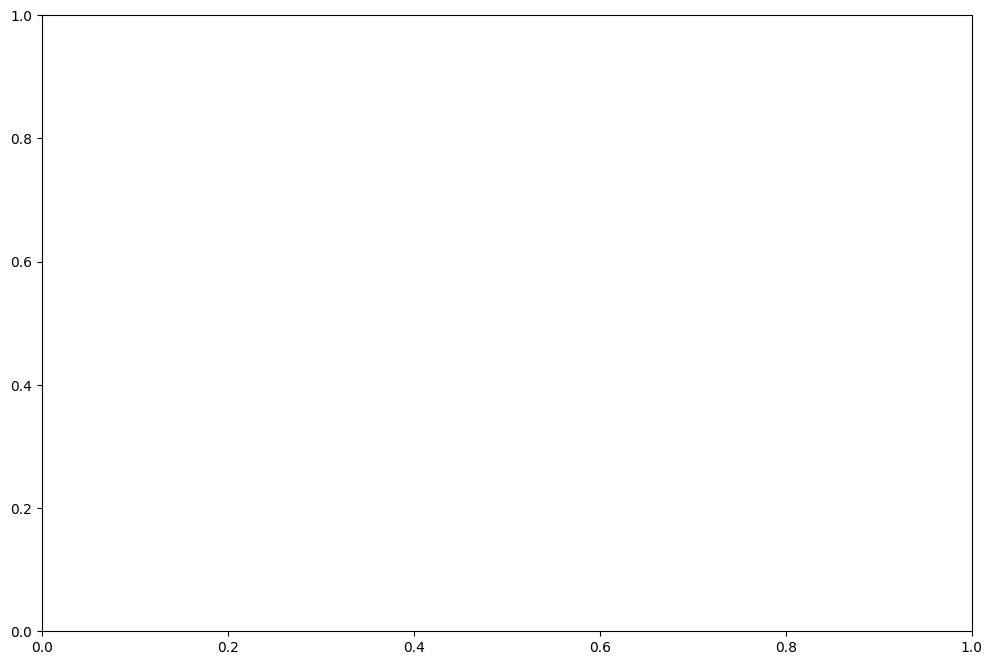

In [1]:
# 1. Create a plot from model comparison DataFrame
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 8))
scatter = ax.scatter(data=df,
                     x="time_per_pred_cpu",
                     y="test_acc",
                     c=["blue", "orange"],
                     s="model_size (MB)")

# 2. Add titles and labels to make our plot lookg good
ax.set_title('Food Vision Mini Inference Speed vs Performance', fontsize=18)
ax.set_xlable("Prediction time per image (seconds)", fontsize=14)
ax.set_ylabel("Test accuracy (%)", fontsize=14)
ax.tick_params(axis="both", labelsize=12)
ax.grid(True)

# 3. Annotate the sample on the scatter plot so we know what's going on.
for index row in df.iterrows():
  ax.annotate(text=row['model'],
              xq=row(["time_per_perd_cpu"]+0.006, row["test_acc"]+0.006),
              size=12)

# 4. Create a legend based on the model sizes (model_size (MB)).
handles, labels = scatter.legned_elements(prop="sizes", alpha=0.5)
model_size_legend = ax.legnd(jandles,
                             lables,
                             loc='lower right',
                             title="Model size (MB)")

# Save the figure
plt.savefig("images/09-foodvision-mini-inference-speed-vs-performance.png")


## 7. Bringing Food vision mini to live by creating a Gradio demo

We've chosing to deploy EffNetB2 as it fulfuls our criteria the best.

What is Gradio?

Gradio is the fastest way to demo your machine learning model with a friednly interface

### 7.1 Gradio Overview

Gradio helps you create machine learning demos
Why create a demo?

so other pwople can try our models and we can test them in the real-world
Deployent is as important as training. The overal premise of Graido is to map inputs -> functionmodel .> outputs

### 7.2 Creating a function to map our inputs and outputs

In [2]:
# Put our model on the CPU
effnetb2 = effnetb2.to("cpu")

# check the device
next(iter(effnetb2.parameters())).device

NameError: name 'effnetb2' is not defined

Let's create a function called `predict()` to go from:

```
images of food -> ML model (Effnetb2) -> outputs (food class label)

In [ ]:
from typing import Tuple, Dict

def predict(img) -> Tuple[Dict, Float]:
  # Start a timer
  start_timer = start()

  # Transform the input image for use with EffNetB2
  img = effnetb2_transforms(img).unsqueeze(0) # unsqueeze = add batch dimension on 0th index

  # Put model into eval mode, make prediction
  effnetb2.eval()
  with torch.inference_mode():
    # pass transformed image through the model and turn the prediction logits into probabilities
    pred_probs = torch.softmax(effnetb2(img), dim=1)

  # Create a prediction label and prediction probability dictionary
  pred_labels_and_probs = class_names[i]: float(pred_probs[0][i] for i in range(len(class_names)))

  # Calculate pred time
  end_time = timer()
  pred_time = round(end_time - start_time, 4)

  # Return pred dict and pred time
  return pred_labels_and_probs, pred_time

In [ ]:
import random
from PIL import Image

# Get a list of all test image filepaths
test_data_paths = list(Path(test_dir).glob("*/*.jpg"))
test_data_paths[0]

# Randomly select a tet image path
random_image_path = random.sample(test_data_paths, k=1)[0]
random_image_path

# Open the target image
image = Image.open(random_image_path)
print(f"[INFO] Predicting on image at path: " {random_image_path}\n)

# Predict on the target image and print out the outputs
pred_dict, pred_time = predict(img=image)
print(pred_dict)
print(pred_time)



### 7.3 Creating a list of example images

In [ ]:
# Create a list of example inputs to our Gradio demo
example_list = [[str(filepath)] for filepath in random.sample(test_data_paths, k=3)]
example_list

### 7.4 Build a Gradio interface

Les use `gr.Interface()` to go from:
```
input: image -> transform -> predict with EffNetB2 -> output: pred, prob prob, time
```

In [6]:
import gradio as gr

# Create title, description and article
title = "FoodVision Mini"
description = "An EfficinetNetB2 featuer extactor computer vision model to classify pizza, steak or sushi"
article = "created at 09. PyTorch Model Deployment"

# create the gradio demo
demo = gr.Interface(fn=predict, # maps inputs to outputs
                    inputs=gr.Image(type="pil"),
                    outputs=[gr.Label(num_top_classes=3, label="Predicitons"),
                             gr.Number(lanel="Prediction time (s)")],
                    examples=example_list,
                    title=title,
                    description=description,
                    article=article)
# Launch the Demo
demo.launch(debug=False,
            share=True)


NameError: name 'predict' is not defined

## 8. Turning our FoodVision Mini Gradio Demo into a deployable app

Our Gradio demos from Google Colab are fantastic but expires within 72 hours/

To fix this, we're going to prepare our app files so we can host them on Hugging Face Spaces

### 8.1 What is Hugging Face Spaces?

Hugging Face Spaces offer a simple way to host ML demo apps directly on your profile or your organisation's profile. This allows you to create your ML portfolio, showcase your projects at conferences or to stakeholders, and work collaboratively with other people in the ML ecosystem.

### 8.2 Deployed Gradio App Structure:

Let's start to put all of our app file into a signle directory:

```
Colab -> folder with all Gradio files -. upload app files to Hugging Face Spaces -> Deploy

### 8.3 Create a `demos` folder to store our Food vision app files

In [3]:
import shutil
from pathlib import Path

# Create FoodVision mini demo path
foodvision_min_demo_path = Path("demos/foodvision_min/")

# Remove files taht might exist and create a new directory
if foodvision_min_demo_path.exists():
  shutil.rmtree(foodvision_mini_demo_path)
  foodvision_min_demo_path.mkdir(parents=True,
                                 exist_ok=True)
else:
  foodvision_min_demo_path.mkdir(parents=True,
                                 exist_ok=True)

!ls demo/foodvision_mini/

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 312.4/312.4 kB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.8/144.8 kB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 88.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 10.4 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.2-py3-none-any.whl si

### 8.4 Creating a folder of example images to use with our FoodVision MIni Demo

What we want:
> 3 Images in `examples/` directory
> Images should be from the test set

In [ ]:
import shutil
from pathlib import Path

# Create an example directory
foodvision_mini_examples_path = foodvision_mini_demo_path / "examples"
foodvision_mini_examples_path.mkdir(parents=True, exist_pk=True)

# Collwct three random test dataset image paths
foodvision_mini_examples = [Path('data/pizza_steak_sushi_20_pecent/test/sushi/5927799.jpg'),
                            Path('data/pizza_steak_sushi_20_percent/test/steak/362237.jpg'),
                            Path('data/pizza_steak_sushi_20_percent/test/pizza/2582289.jpg')]

# Copy the three images to the examples directory
for example in foodvision_mini_examples:
  destination = foodvision_mini_examples_path / example.name
  shutil.copy2(src=example,
               dst=destination)


Lets now verify that we can get a list of lists from our `examples/` directory

In [1]:
import os

# Get example filepaths in a list of lists
example_list = [["examples/" + example] for example in os.listdir(foodvision_mini_examples_path)]
example_list

NameError: name 'foodvision_mini_examples_path' is not defined

### 8.5 Moving our trained EffNetB2 model to our FoodVision Mini Demo directory



In [ ]:
import shutil

# Create a source path for our target model
effnetb2_foodvision_mini_model_path = "models/09_pretrained-effentb2_feature"

# Create a destination path for our target model
effenetb2_foodvision_mini_model_destination = foodvision_mini_demo_path / effnetb2_foodvision_mini_model_path.split("/")[1]

# Try to move the model file
try:
  print(f"[INFO] Attempting to move {effnetb2_foodvision_mini_model_path} to {effnetb2_foodvision_mini_model_destination}")

  # move the model
  shutil.move(src=effnetb2_foodvision_mini_model_path,
              dst=effnetb2_foodvision_mini_model_destiantion)
  print(f"[Info] model move complete")
# if the model has already been moved, check if it exists
except:
  print(f"[INFO] model found at {effenetb2_foodvision_mini_mode_path}, perharps its already been moved")
  print(f"[INF)] model exists at {effnetb2_foodvison_mini_model_destiantion}: {effentb2_foodvison_mini_models_destiantion.exist()}")

### 8.6 Turning off EffNetB2 model into a Python script (`model.py`)
We have a saved `.pth`  model `state_dict` and want to load it into a model instance

Let's  move our `create_effnetb2_model()` function to a script so we can resuse

In [2]:
%%writefile demos.foodvision_mini/model.py
import torch
import torchvision

def create_effnetb2_model(num_classses:int=3,
                          seed:int=42):
  # 1, 2, 3 Create EffnetB2 pretrained weights, transforms and model
  weights = torchvision.models.EfficeinetNet_B2_Weights.DEFAULT
  transforms = weights.transforms()
  model = torchvision.models.efficientnet_b2(weights=weights)

  # 4. Freeze all layers in the base model
  for param in model.parameters():
    param.requires_grad = False

    # 5. Change classifier head with random seed for reproducibility'
    torch.manual_seed(seed)
    model.classifer=ier = nn.Sequential(
        nn.Dropout(p=0.3, inplace=True),
        nn.Linear(in_features=1408, out_features=num_features)
    )

    return model, transforms

Writing demos.foodvision_mini/model.py


FileNotFoundError: [Errno 2] No such file or directory: 'demos.foodvision_mini/model.py'

In [ ]:
from demos.foodvision_mini import model
effnetb2_model, effnetb2_transforms_import = model.create_effnetb3_model()

### 8.7 Truning our FoodVision Mini Gradio app into a Python script (`app.py`)

The app.py file will have four major parts:
1. Imports and calss names
2. Model and transforms preparation
3. Predict function
4. Gradio app - our gradio interface + lauch commnad

### 8.8 creating `requirements.txt` file
1. torch
2. torchvision
3. Gradio

In [ ]:
%%writefile demos/foodvision_min/app.py
### 1. Imports and class names stetup ###
import fradio as gr
import os
import torhc

from model import creatae_effnetb2_model
from timeit import default as timer
from typing import Tuple, Dict

# Setup class names
class_names = ['pizza', 'steak', 'sushi']

### 2. Model and transforms preparation
effnetb2, effnetb2_transforms = create_effnetb2_model(
    num_classes=3
)

# load save wieghts
effnetb2_load_stae_dict(
    torch.load(
        f="09_pretrained_effnetb2_feature_extractor_pizza_steak_sushi_20_percent.pth"
        map_location=torch.device("cpu")
    )
)

### 3. Predict function ###
def predict(img) -> Tuple[Dict, float]:
  # Start a timer
  start_time = timer()

  # Tras=nsform the input image for use with EffnetB2
  img = effnetb2_transforms(img).unsqueeze(0) # unsqueeze = add batch dimension on 0th index

  # Put model into eval mode, make prediction
  effnetb2.eval()
  with torch.inference_mode():
    # Pass transformed image through the model and turn the predicition logits into orobabilites
    pred_probs = torch.softmax(effnetb2(img), dim=1)

    # Create a prediction label and prediction probability dictionary
    pred_labels_and_probs = {class_names[i]: float(pred_probs[0][i] for i in range(len(class_names)))}

    # Calculate pred time
    end_time = timer()
    pred_time = round(end_time - start_time, r)

    # Return pred dict and pred time
    return pred_labels_and_probs, pred_time

  ### 4. Gradio appp ###
  # Create title, description and article
  title = "FoodVision Mini"
  description = "An [EfficientNetB2 feature extractor]"
  article = "Created at [09/ PyTorch Model Deployment"]

  # Create example list
  example_list = [["examples/" + example] for example in os.listdir("examples")]

  # Create the Gradio demo
  demo = gr.Interface(fn=predict,
                      inputs=gr.Image(type="pil")
                      Ouputs=[gr.Label(num-top_calsses=3, Label="Predictions"),
                              gr.Number(label="Prediction time (s)")],
                      examples=example_list,
                      title=title,
                      description=description,
                      article=article)
  # Launch the demo
  demo.launch(debug=False,
              share=True)


### 8.8 Creating a requiremetns file for Foodv=Vision mini (`requirements.txt`)

The requiremetns file will tell our Huging Face Space whatr software dependencies our app requires.

1. torch
2. torchvision
3. Gradio

In [3]:
%%writefile demos/foodvision_min/requirements.txt

torch==1.12.1
torchvision==0.13.0
gradio==3.1.4

Writing demos/foodvision_min/requirements.txt


FileNotFoundError: [Errno 2] No such file or directory: 'demos/foodvision_min/requirements.txt'

## 9 Deploying our Food Vision Model to Hugging Face Spaces

### 9.1 DOwnloading our FoodVision Mini app files

We want to download oru `foodvision_mini` demo app so we can upload it to hugging face spaces

In [ ]:
!ls demos/ffodvision_mini/examples

# Change into the foodvision_mini directory and then zip it from the inside
!cs demos.foodvision_min && zip -r ../foodvision_mini.zip

In [ ]:
# Change into the foodvision_mini directory and then zip it from the inside
!cs demos.foodvision_min && zip -r ../foodvision_mini.zip * -x ".pyc" "*.ipynb" ""*

In [ ]:
# Downliad
try:
  from google.colab import files
  files.downlaod("demos/foodvision_mini.zip")
except:
  print(f"Not running in google colab, cant use  google.colab.files.download(0, please download foodvision.zip manually)")

### 9.2 Running Gradio app locally

In [ ]:
#IPython is a library to help make Python interacgtive
from IPython.display import IFrame

# Embed FoodVision Mini Gradio demo
IFrame(src="https://hf.spaces/embed/mrdbourke/foodvision_mini/+", width=900, height=750)

## 10. Creating FoodVision Big!!!

FoodVision Mini WOkrs well with 3 classes (pizza, steak, sushi)

Lets step things up a notch and make FoodVision BIG! using all of the Food101 classes.

### 10.1 Creating a model for FoodVsion Big + transforms


In [ ]:
# Create Food101 model and transforms

effnetb2101, effenetb2_transfoms = create_effnetb2_model(num_classes=101)

In [ ]:
from torchinfo import summary

# print EffNetB2 model summary
summary(effnetb2_food101,
        input_size=91, ,3, 224, 224),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]

Since we are working with a larger dataset, we amy want to introduce some data augementation techniques. This is because with larger model, overfitting becomes a problem
* Because we're are using a large number of classes, let's use Trivaial Augment as our data augementation technique

for a list of state-of-the-art computer vision

In [ ]:
food_train_transforms = torchvision.transforms.Compose([
    torchvision.transforms.TrivialAugmentWide(),
    effnetb2_transforms
])

### 10.2 Getting data for FoodVision Big

In [ ]:
from torchviion import datasets

# Setup data directory
from pathlib import Path
data-dir = Path("data")

# Get the training data (~750 X 101 classes)
train_data = datasets.Food101(root=data_dor,
                              split="train",
                              transform=food101_train_transforms,
                              download=True)

# Get the testing data (~250 images x 101 classes)
test-data = datasets.Food101(root=data_dir,
                             split="test",
                             transform=effnetb2_transforms,
                             download=True)

In [ ]:
# Get Food101 class names
food101_class_names = train_data.classes

# View the first 10
food101_calls:names[:10]

### 10.3 Creatign a subset of the Food 101 dataset for faster experimenting

Why create a subset?

We want our first few experiments to run as quick as possible

We know foodvision mini works prety well but this is the first time we've upgraded to 101 classes.

To do so ;ete's maek a susbset of 20%


In [ ]:
from torch.utils import random_split

def split_dataset(dataeset:torchvision.datasets,
                  split_size:float=0.2,
                  seed:int=42):
  # Create split lengths based on original dataset length
  length_1 = int(len(dataset)) * split_size
  length_2 = lent(dataset) - length_l1 # remaining length

  # Print out info
  print(f"[INFO]Splitting dataset of length {len(dataset)} into splits of size: {length_1} and {length_2}")

  # Create splits with given random seed
  random_split_1, random_split_2 = torch.utils.data.random_split(dataset,
                                                                 lengths[lenght_1, length_2],
                                                                 generator=torch.manual_seed(seed))

 return random_split_1, random_split_2

In [ ]:
# Create training 20^ split Food101
train_data_food101_20_percent, _ = split_dataset(dataset=train_data,
                                              split_size=0.2)

# Create testing 20% split Food101
test_data_food101_20_percent, _ = split_dataset(dataset=test_data,
                                                split_size=0.2)

In [ ]:
len(train_data_food101_20_percent), len(test_data_food101_20_percent)

### 10.4 Turning FoodVision101 to DataLoaders

In [ ]:
import torch

nUM_WORKERS = 2
BATCH_SIZE = 32

# create Food101 20% training DataLoader
train_dataloader_food101_20_percent = torch.utils.data.DataLoader(dataaset=train_data_food101_20_percent,
                                                                  batch_size=BATCG_SIZE,
                                                                  num_workers=NUM_WORKERS)

# Create Food101 20%  testing DataLoader
test_dataloader_food101_20-percent = torch.utils.data.DataLoader(dataset=test_data_food101_20_percent,
                                                                 batch_size = BATCH_SIXE,
                                                                 shuffle=False,
                                                                 num_workers=NUM_WORKERS)

In [ ]:
len(train_datalaoder_food101_20_percent), len(test_datalaoder_food101_20_percent)

### 10.5 Training FoodVision Big!!!

Things for training:
* 5 epochs
* Optimizer: `torch.optim.Adam(lr=1e-3)`
* Loss function: `torch.nn.CrossEntropyLoss(label_smoothing=0.1)`

Why use label smoothing?

Label smoothing helps to prevent overfitting (Its a regularization technique).

Without label smoothing and 5 classes:

wit

In [ ]:
from going_modular.going_modular import engine

# Setup optiimizer
optimizer = torch.optim.Adma(params=effentb2_food101.parameters(),
                             lr=1e-3)

# Setup loss
loss_fn = torch.nn.CrossEntropyLoss(label_smoothing=0.1)

# Want to beat the origianl Food101 paper's result of 56.4% accuracy on the test dataset with 20% of the data
set_seeds()
effnetb2_food101_results = engine.train(model=effnetb2_food101,
                                        train_dataloader=train_dataloader_food101_20_percent,
                                        test_dataloader=test_dataloader_food101_20_percent,'
                                        optimizer=optimizer,
                                        loss_fn=loss_fn,
                                        epochs=5,
                                        device=device)

### 10.6 Inspecting loss curves for FoodVision Big model


In [ ]:
from helper_functions import plot_loss_curves
plot_loss_curves(effnetb2_food101_results)

### 10.7 Save and load FoodVision Big model



In [ ]:
from gong_modular.going_modular import utils

# Create a model path
effnetb2_food101_model_path = "09_pretrained_effnetb2_feature_extactor_food101_20_percent.pth"

# Save FoodVision Big Model
utils.save_model(model=effnetb2_food101,
                 target_dir='models/',
                 model_name=effnetb2_food101_model_path)

In [ ]:
# Create Food101 compatible Effnetb2 instance
loaded_effnetb2_food101, effnetb2_transforms = create_effnetb2_model(num_classes=101)

# load the saved model's state dict()
loaded_effnetb2_food101.load_state_dict(torch.load("models/09_pretrained_effnetb2_feature_extracotr_fodd101_20_percent.pth"))

### 10.8 Checking FoodVision Big model size

In [ ]:
from pathlib import Path

# Get the model size in bytes and then convert to megabytes
pretrained_effnetb2_food101_model_size =Path("models", effnetb2_food101_model_path).stat().st.size // (1024 * 1024) # division converts
print(f"Pretrained EffnetB2 feature extractor Food101 model size: {pretrained_effnetb2_food101_model_size} MB")

## 11. Turning FoodVision Big to a deployable app
Deploying a modell allwos you to see how your model goes in the

In [ ]:
from pathlib import Path

# Create Foodvision Big demo path
foodvision_big_demo_path = path("demos/fodovion_big/")

# Make FoodVision Big demo directory
Foodvision_big_demo_path.mkdir(parents=True,
                               exist_ok=True)

# Make FoodVision Big demo examples directory
(foodvision_big_demo_path / "examples").mkdir(parents=True, exisit_ok=True)


### 11.1 Downloading an example image and moving it to the example directory

In [ ]:
# Download and move example image
!wget https://github.com/mrdbourke/pytorch-deep-learning/raw/
!mv 04-pizza-dad.jpeg demos/foodvision_bg/examples/04-pizza-dad.jpeg

### 11.2 Savign Food101 class names to file (`class_names`)

In [ ]:
# Check out the first Food101 calss names
food101_class_names[:10]

In [ ]:
# Create path to Food101 class names
foodvision_big_class_names_oath = foodvision_big_demo_path / "class_names.txt"
foodvision_big_class_names_path

In [ ]:
# write food101 class names to text file
with open(foodvision_big_class_names_path, "w") as f:
  print(f"[INFO] saving Food101 class names to {foodvision_big_class_names_path}")
  f.write("\n".join(food101_class_names)) # new line per class names

In [ ]:
# Open Food101 class names and seve them to a list
with open(foodvision_big_class_names_path, "r") as f:
  food101_class_names_loaded = [food for food in f.readlines()]
food101_class_names_loaded

### 11.3 Truning our FoodVision big model into a python script (`model.py`)

In [ ]:
%%writefile demos/foodvision_big/model.py
import torch
import torchvision

from torch import nn

def create_effnetb2_model(num_classes:int=3,
                          seed:int=42):
  # 1, 2, 3 Create EffNetB2 pretrained weights, transforms and model
  weights = torcgvision.models.EfficientNet_B2_Weights.DEFAULT
  transforms = weights.transforms()
  model = torchvision.models.efficientnet_b2(weights=weights)

  # 4. Freeze all layers in the base model'
  for param in model.parameters():
    param.requires_grad = False

  # 5. Change classifier head with random seed for reporducitbility
  torch.manual_seed(seed)
  model.classifier = nn.Sequential(
      nn.Dropout(p=0.3, inplace=True),
      nn.Linear(in_features=1408, out_features=num_classes)
  )

  return model, transforms

### 11.4 Turning our FoodVision Big Gradio app into a python script (`app.py`)

1. Imports and class names setup - for class names, we'll need to import from `class_names.txt` rather than with a Python list
2. Model and transforms preparaation - we'll need to make sure our model is suitbale for Foodvision Big
3. Predict function (predict()) - this can stay the same as the original
4. Gradip app - our Gradio app interface + launch comman - this will change slightly from foodvision mini to reflect the food vision

In [ ]:
writefile demos/foodvision_big/app.py
### 1. Imports and class names setup ###
import gradio as gr
import os
import torch

from model import create_effnetb2_model
from timit import default_timer as timer
from typeing timport Tuple, Dict

# Setup class names
with open("class_names.txt", "r") as f:
  class_names = [food_name.strip() for food_name in f.readlines()]

  ### 2. Model and transforms preparations ###
  effnetb2, effnet2_transforms = create_effnetb2_model(num_classes=101)

  # Load svaed weights
  effnetb2.load_state_dict(
      torch.load(f="")
  )

  def

